In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
def collect_loss(nohup_file):
    steps = []
    loss1 = []
    loss2 = []
    with open(nohup_file, 'r') as f:
        for line in f.readlines():
            if line[0] in "0123456789":  # the line with loss, rate, seconds, images
                try:
                    tokens = line.strip().split()
                    number_of_steps = int(tokens[0][:-1])
                    loss = float(tokens[1][:-1])
                    loss_avg = float(tokens[2])
                    steps.append(number_of_steps)  # number of steps
                    loss1.append(loss)  # loss
                    loss2.append(loss_avg)  # loss average
                except:
                    pass
    return steps, loss1, loss2

# steps 76678 76678 76678


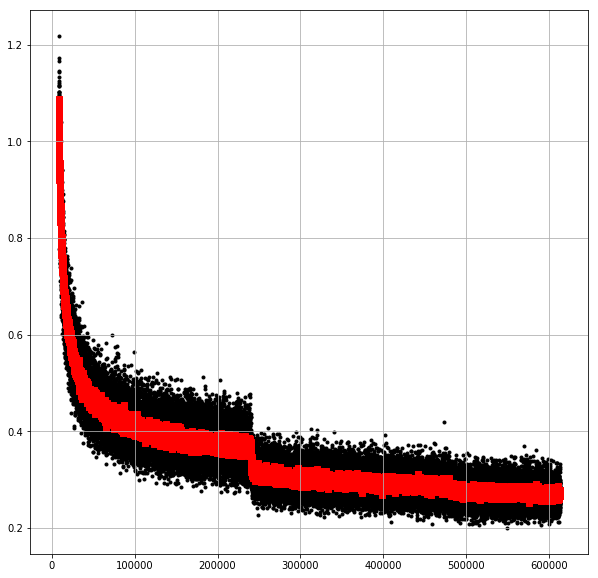

In [31]:
# nohup = "/home/ssd_array0/Develop/liyu/g-darknet/nohup.out"
nohup = "/home/ssd_array0/Develop/liyu/darknet/nohup.out"
# nohup = "/home/ssd0/Develop/liyu/darknet/nohup.out_train13"
# nohup = "/home/hdd0/Develop/algo/yolo-pre-trained/darknet/nohup.out"
# nohup = "/home/unicorn/Documents/liyu/darknet/nohup.out"
steps, loss1, loss2 = collect_loss(nohup)
print("# steps", len(steps), len(loss1), len(loss2))

# plot trend
fig, ax = plt.subplots(1, 1, figsize=(10,10))

start, end = 1000, len(steps)

ax.grid()
ax.scatter(steps[start:end], loss1[start:end], marker='.', color='black')
ax.scatter(steps[start:end], loss2[start:end], marker='s', color='red')

plt.show()

### evaluate weights on validation set

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import ast
import matplotlib.pyplot as plt

In [3]:
def parse_txt(txt):
    raw, ref = {}, {}
    passed = False
    with open(txt, 'r') as f:
        for line in f.readlines():
            line = line.strip()
            tokens = line.split(" = ")
            if line and not passed:
                raw.update({tokens[0]:ast.literal_eval(tokens[1])})
            elif line and passed:
                ref.update({tokens[0]:ast.literal_eval(tokens[1])})
            else:
                passed = True
    return raw, ref

In [4]:
txt1 = "/home/ssd_array0/Develop/liyu/darknet/backup/gnet2/gnet2_300000.evaluation"
txt2 = "/home/ssd_array0/Develop/liyu/darknet/backup/gnet2/gnet2_400000.evaluation"
txt3 = "/home/ssd_array0/Develop/liyu/darknet/backup/gnet2/gnet2.evaluation"

txts = [txt1, txt2, txt3]
results = {}
for i,txt in enumerate(txts):
    raw, ref = parse_txt(txt)
    results[i] = {"raw":raw, "ref":ref}

In [5]:
classes = results[0]["ref"].keys()
xs = ["recall", "precision", "recall_b", "precision_b"]
plot_data = {class_i:{i:[] for i in range(len(txts))} for class_i in classes}
for class_i in classes:
    for i in range(len(txts)):
        plot_data[class_i][i] = [results[i]["ref"][class_i][x] for x in xs]

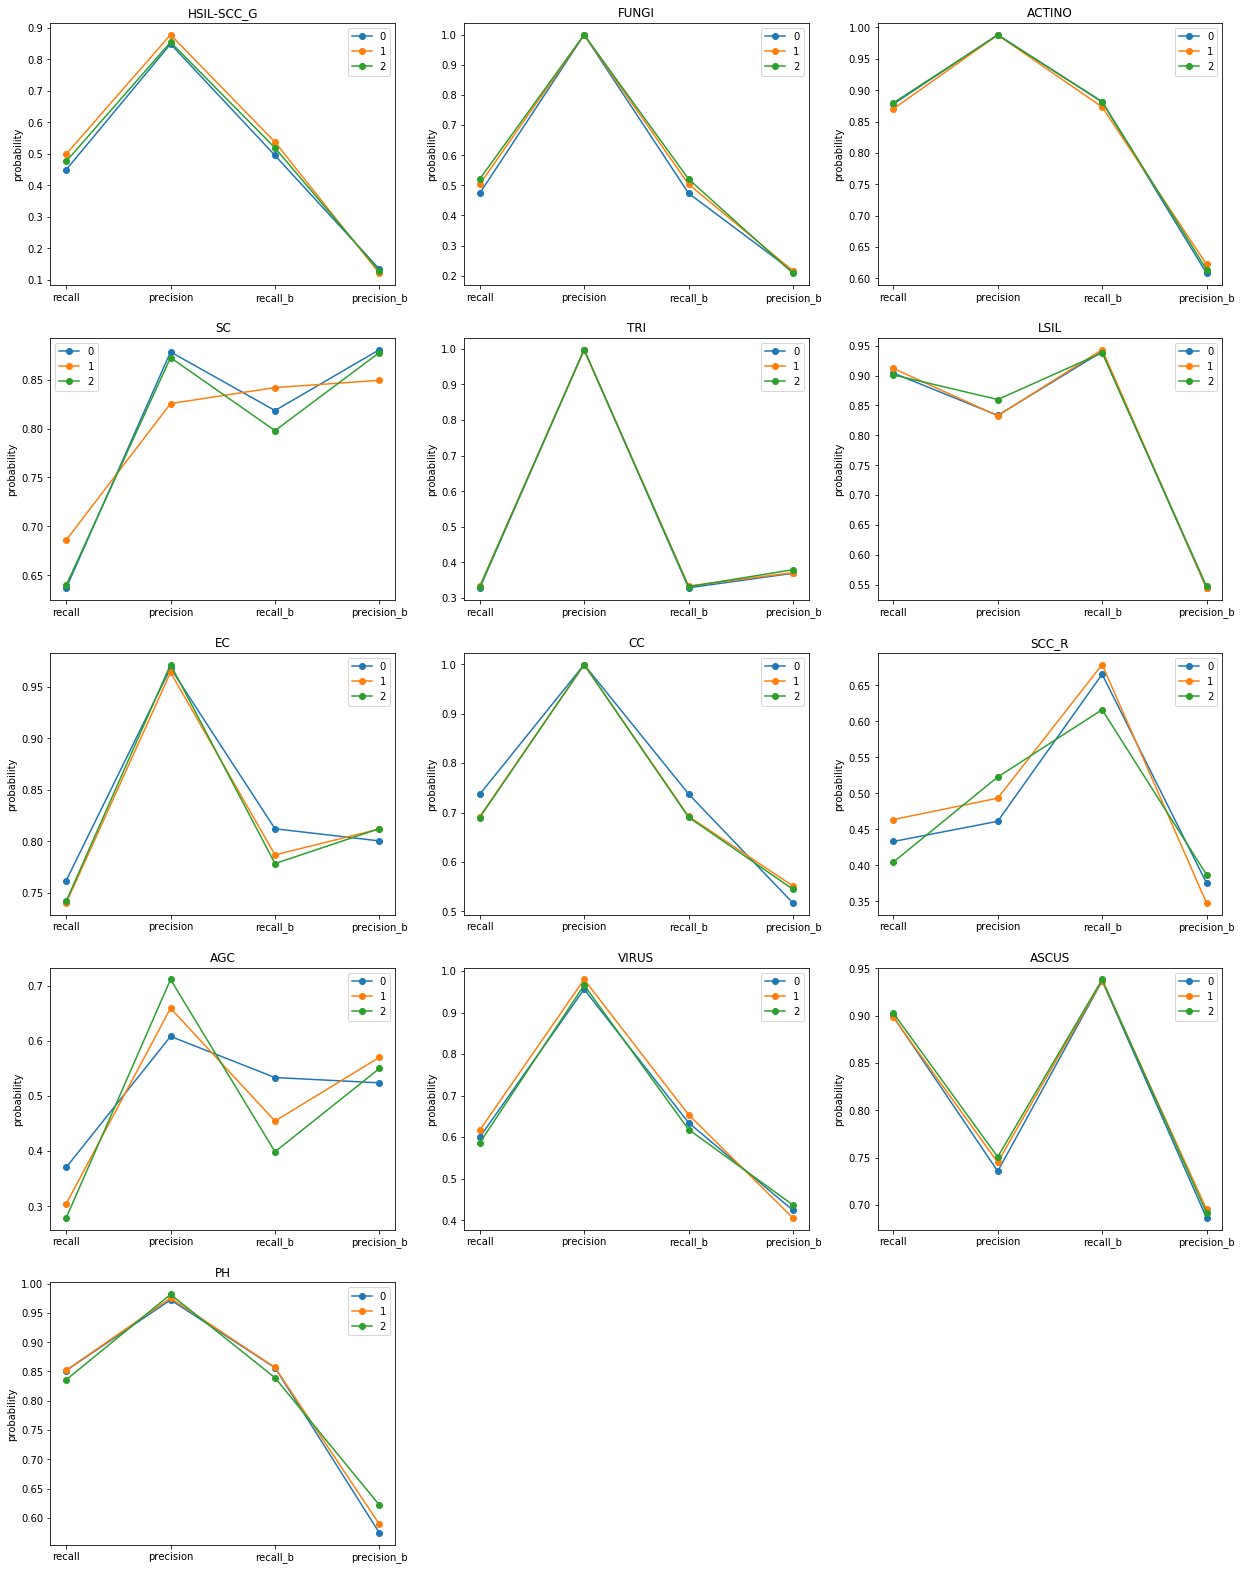

In [6]:
f = plt.figure(figsize=(21, 28))

for i,class_i in enumerate(classes):
    ax = f.add_subplot(5, 3, i+1)
    ax.set_title(class_i, fontsize=12)
    data_i = plot_data[class_i]
    for key,value in data_i.items():
        ax.plot(xs, value, label=str(key), marker='o')
    ax.legend()
    # ax.set_xlabel("evaluation", fontsize=10)
    ax.set_ylabel("probability", fontsize=10)

plt.show()